This notebook is part the of Dr. Christoforos Christoforou's course materials. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials or any of their derivatives without the instructor's express written consent.

# Problem Set 02 - Instance-based Classifiers
**Professor:** Dr. Christoforos Christoforou

For this problem set you will need the following libraries, which are pre-installed with the colab environment:

* [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
* [Pandas](https://pandas.pydata.org/) is a library for data manipulation and data analysis.
* [Matplotlib](https://matplotlib.org/) is a library which generates figures and provides graphical user interface toolkit.

You can load them using the following import statement:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

## 1. Objective
As part of this problem set, you will expore work on the `wine quality dataset`  in order to:
- To explore the physiocochemical properties of red wine
- To determine an optimal machine learning model for red wine quality classification

For that, you will be using an `instance-based` classifier, namely K-NN algorithm. Review the information provided in the problem set, and complete all challenges listed.  

## 2. Wine Quality Dataset - Data Description

For this dataset you will be using the `wine quality dataset`. Below is a description of the various parameters listed in that dataset (i.e. potential features):

* fixed.acidity (tartaric acid - g / dm^3): most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
* volatile.acidity (acetic acid - g / dm^3): the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
* citric.acid (g / dm^3): the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
* residual.sugar (g / dm^3): the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
* chlorides (sodium chloride - g / dm^3): the amount of salt in the wine
* free.sulfur.dioxide (mg / dm^3): the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
* total.sulfur.dioxide (mg / dm^3): amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
* density (g / cm^3): the density of water is close to that of water depending on the percent alcohol and sugar content
* pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
* sulphates (potassium sulphate - g / dm3): a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
* alcohol (% by volume): the percent alcohol content of the wine
* quality: quality score between 0 and 10



## Download dataset from kaggle
You will use the Kaggle CLI to dowload the `Wine Quality Dataset` to your colab enviroment. You will need to upload your kaggle API (see problem_set 01 for direction on how to obtain your API key.

In [2]:
# install kaggle CLI
!pip install -q kaggle

In [3]:
# Upload the kaggle API key of your account
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [4]:
# View list of data files available in the dataset.
# Format : kaggle dataset files <dataset-URI>
!kaggle datasets files cchristoforou/practice-dataset-for-tutorials

name                       size  creationDate                
-----------------------  ------  --------------------------  
countries.csv              2485  2021-02-25 21:48:51.465000  
country_total.csv        546179  2021-02-25 21:48:51.442000  
dataset_37_diabetes.csv   33824  2021-02-25 21:48:51.881000  
wine.data                 10782  2021-02-25 21:48:51.885000  
wineQualityReds.csv       94286  2021-02-25 21:48:51.458000  


In [6]:
# Download - Specify the parameters.
kaggle_dataset_URI = "cchristoforou/practice-dataset-for-tutorials"
output_folder = "sample_data/problem_set02"
kaggle_data_file1 = "wineQualityReds.csv"

In [7]:
# Download the first file from dataset - countries.csv
!kaggle datasets download $kaggle_dataset_URI --file $kaggle_data_file1 --path $output_folder


Dataset URL: https://www.kaggle.com/datasets/cchristoforou/practice-dataset-for-tutorials
License(s): unknown
  0% 0.00/92.1k [00:00<?, ?B/s]
100% 92.1k/92.1k [00:00<00:00, 225MB/s]


## Load the data
The code below showcase how to load the data in a pandas `DataFrame` and apply a train_test_split on the data.

In [8]:
# Code to load the data from file. Here we use the pandas library to read the csv file.
datafile = "./sample_data/problem_set02/wineQualityReds.csv"
wine_df = pd.read_csv(datafile)
wine_df.drop(wine_df.columns[0],axis=1,inplace=True)

In [12]:
from sklearn.model_selection import train_test_split
# Split the data into a training and testing set using the sklearn function train_test_split
# Noteice that
X_train, X_test, y_train, y_test = train_test_split(wine_df.drop('quality',axis=1), wine_df['quality'], test_size=.25, random_state=42)

## Challenge 1
Use the variables `X_train`, `X_test`, `y_train`, and `y_test` to explore your data. In particular, calculate and display the following information.

* Number of samples in the training set in total and in each class.
* Number of samples in the testing set in total and in each class.
* Number of features in the dataset.
* Number of classes in the dataset.
* IDs of the number of classes.


In [16]:
# Your Solution here
X_train, X_test, y_train, y_test.shape

(      fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
 582            11.7             0.490         0.49             2.2      0.083   
 626             8.8             0.600         0.29             2.2      0.098   
 1030            7.1             0.590         0.00             2.1      0.091   
 620             8.3             0.540         0.24             3.4      0.076   
 490             9.3             0.775         0.27             2.8      0.078   
 ...             ...               ...          ...             ...        ...   
 1130            9.1             0.600         0.00             1.9      0.058   
 1294            8.2             0.635         0.10             2.1      0.073   
 860             7.2             0.620         0.06             2.7      0.077   
 1459            7.9             0.200         0.35             1.7      0.054   
 1126            5.8             0.290         0.26             1.7      0.063   
 
       free.su

# Challenge 2

Train a **K-NN** classifier using the `(X_train,y_train)` dataset and use the trained model to predict the underlying classes for the observations in the test dataset `X_test`. Store your prediction in a variable called `y_pred`.

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Your solution
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Challenge 3

Evaluate the performance of your classifier. Calculate and display the following:
* print the `confusion matrix`.
* `normalized confusion matrix`.
* the probablitity of correct classification (accuracy score).
* the `precision`, `recall`, and `f1-score` for each class.

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np

# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Normalized Confusion Matrix
print("\nNormalized Confusion Matrix:")
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy:.4f}")

# Precision, Recall, F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 0  1  3  8  1  0]
 [ 1 12 98 48  4  1]
 [ 0 15 74 62 18  0]
 [ 0  0 10 21 15  2]
 [ 0  0  1  2  2  0]]

Normalized Confusion Matrix:
[[0.         0.         1.         0.         0.         0.        ]
 [0.         0.07692308 0.23076923 0.61538462 0.07692308 0.        ]
 [0.00609756 0.07317073 0.59756098 0.29268293 0.02439024 0.00609756]
 [0.         0.0887574  0.43786982 0.36686391 0.10650888 0.        ]
 [0.         0.         0.20833333 0.4375     0.3125     0.04166667]
 [0.         0.         0.2        0.4        0.4        0.        ]]

Accuracy Score: 0.4400

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.04      0.08      0.05        13
           5       0.52      0.60      0.56       164
           6       0.44      0.37      0.40       169
           7       0.38      0.31      0.34        48
           8       0.00      0.00    

# Challenge 4

The code below loads the same dataset, but treats it as a binary classification problem. That is, instead of classifying an observation into one of 10 categories (0..10), we consider all observations with score above 5 as being good and all observation below or equal to five as being bad.





In [22]:
# Code to load the data from file. Here we use the pandas library to read the csv file.
datafile = "./sample_data/problem_set02/wineQualityReds.csv"
wine_df = pd.read_csv(datafile)
wine_df.drop(wine_df.columns[0],axis=1,inplace=True)

wine_df['quality'] = np.where(wine_df['quality']>5,"Good","Bad")

In [23]:
X_train, X_test, y_train, y_test = train_test_split(wine_df.drop('quality',axis=1), wine_df['quality'], test_size=.25, random_state=42)


## Callenge 4.1
Use the variables `X_train`, `X_test`, `y_train`, and `y_test` to explore your data. In particular, calculate and display the following information.
* Number of samples in the training set in total and in each class.
* Number of samples in the testing set in total and in each class.
* Number of features in the dataset.
* Number of classes in the dataset.
* IDs of the number of classes.




In [24]:
# Your Solution
X_train, X_test, y_train, y_test.shape


(      fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
 582            11.7             0.490         0.49             2.2      0.083   
 626             8.8             0.600         0.29             2.2      0.098   
 1030            7.1             0.590         0.00             2.1      0.091   
 620             8.3             0.540         0.24             3.4      0.076   
 490             9.3             0.775         0.27             2.8      0.078   
 ...             ...               ...          ...             ...        ...   
 1130            9.1             0.600         0.00             1.9      0.058   
 1294            8.2             0.635         0.10             2.1      0.073   
 860             7.2             0.620         0.06             2.7      0.077   
 1459            7.9             0.200         0.35             1.7      0.054   
 1126            5.8             0.290         0.26             1.7      0.063   
 
       free.su

## Challenge 4.2
Train a **K-NN** classifier using the `(X_train,y_train)` dataset and use trained model to predict the underlying classes for the observations in the test dataset `X_test`. Store your prediction in a variable called `y_pred`.

In [26]:
# Your solution

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Challenge 4.3
Evaluate the performance of your classifier. Calculate and display the following:
* print the `confusion matrix`.
* `normalized confusion matrix`.
* the probablitity of correct classification (accuracy score).
* the `precision`, `recall`, and `f1-score` for each class.

In [27]:
# Your Solution
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np

# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Normalized Confusion Matrix
print("\nNormalized Confusion Matrix:")
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy:.4f}")

# Precision, Recall, F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[108  70]
 [ 82 140]]

Normalized Confusion Matrix:
[[0.60674157 0.39325843]
 [0.36936937 0.63063063]]

Accuracy Score: 0.6200

Classification Report:
              precision    recall  f1-score   support

         Bad       0.57      0.61      0.59       178
        Good       0.67      0.63      0.65       222

    accuracy                           0.62       400
   macro avg       0.62      0.62      0.62       400
weighted avg       0.62      0.62      0.62       400



# Challenge 5

The **Knn** classifier accepts a number of parameters. One of those parameters is the number K (i.e. the number of nearest neighbors to consider when making a prediction. Evaluate the classifier for different values of K and identify which configuration achieve the best performance on the testing set. Plot or print your results.


In [33]:
# Your solution here.
from sklearn.neighbors import KNeighborsClassifier
k_values = np.arange(1, 5)
print(f"Defined K values: {k_values}")
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_k)
    accuracy_scores.append(accuracy)

print("Accuracy scores for each K:")
for k, acc in zip(k_values, accuracy_scores):
    print(f"K={k}: {acc:.4f}")



Defined K values: [1 2 3 4]



Copyright Statement: Copyright © 2020 Christoforou. The materials provided by the instructor of this course, including this notebook, are for the use of the students enrolled in the course. Materials are presented in an educational context for personal use and study and should not be shared, distributed, disseminated or sold in print — or digitally — outside the course without permission. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials as well as any of their derivatives without the instructor's express written consent.

# Task
Evaluate the K-NN classifier's performance for a range of K values (1 to 30) using the `wineQualityReds.csv` dataset, configured as a binary classification problem. For each K, train the model on `X_train` and `y_train`, predict on `X_test`, and calculate the accuracy. Plot the accuracy scores against the K values to visualize performance, and identify the K value that achieves the highest accuracy, along with its corresponding accuracy score.

## Define K Values

### Subtask:
Define a range of K values to evaluate for the K-NN classifier. A reasonable range would be from 1 to 20 or 30.


**Reasoning**:
I need to create a list of integers from 1 to 30 for `k_values` as specified in the instructions. `np.arange` is suitable for generating this sequence.



In [30]:
k_values = np.arange(1, 31)
print(f"Defined K values: {k_values}")

Defined K values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


**Reasoning**:
Now that the `k_values` are defined, I need to iterate through each K, train a KNeighborsClassifier, make predictions, and store the accuracy to evaluate the classifier's performance across different K values.



In [31]:
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_k)
    accuracy_scores.append(accuracy)

print("Accuracy scores for each K:")
for k, acc in zip(k_values, accuracy_scores):
    print(f"K={k}: {acc:.4f}")

Accuracy scores for each K:
K=1: 0.6475
K=2: 0.5875
K=3: 0.6200
K=4: 0.5925
K=5: 0.6200
K=6: 0.5975
K=7: 0.5975
K=8: 0.5975
K=9: 0.6050
K=10: 0.5950
K=11: 0.6025
K=12: 0.5875
K=13: 0.6000
K=14: 0.5975
K=15: 0.6050
K=16: 0.6125
K=17: 0.6250
K=18: 0.6200
K=19: 0.6275
K=20: 0.6225
K=21: 0.6300
K=22: 0.6175
K=23: 0.6275
K=24: 0.6350
K=25: 0.6300
K=26: 0.6350
K=27: 0.6275
K=28: 0.6175
K=29: 0.6250
K=30: 0.6175


**Reasoning**:
To visualize the performance of the K-NN classifier across different K values, I need to plot the calculated accuracy scores against the corresponding K values. This will help in identifying trends and the optimal K.



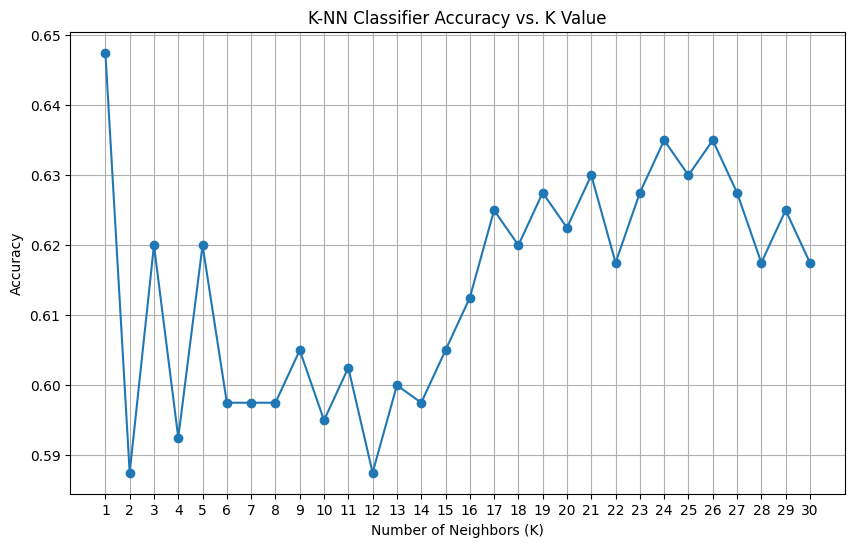


Optimal K value: 1
Highest accuracy: 0.6475


In [32]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('K-NN Classifier Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the optimal K value
best_k_index = np.argmax(accuracy_scores)
best_k = k_values[best_k_index]
best_accuracy = accuracy_scores[best_k_index]

print(f"\nOptimal K value: {best_k}")
print(f"Highest accuracy: {best_accuracy:.4f}")

## Final Task

### Subtask:
Provide a summary of the evaluation, including the optimal K value and its corresponding performance metrics.


## Summary:

### Q&A
The optimal K value identified for the K-NN classifier is 1, which achieved the highest accuracy of 0.6475.

### Data Analysis Key Findings
*   A range of K values from 1 to 30 was evaluated for the K-NN classifier.
*   The accuracy scores for the K-NN classifier across the tested K values ranged from approximately 0.5875 to 0.6475.
*   The optimal K value that yielded the highest accuracy was found to be K=1.
*   The highest accuracy achieved by the K-NN classifier was 0.6475, corresponding to K=1.

### Insights or Next Steps
*   The result suggests that for this specific dataset and binary classification setup, a single nearest neighbor (K=1) provides the best predictive performance among the tested range. This could indicate distinct clusters or a strong local signal.
*   Further investigation could involve exploring other classification metrics (e.g., precision, recall, F1-score) to get a more comprehensive understanding of the model's performance, especially considering potential class imbalance.
